# Context
This dataset contains 15,977 survey responses with 24 attributes describing how we live our lives.
How can we reinvent our lifestyles to optimize our individual wellbeing while supporting the UN Sustainable Development Goals?

Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.


Link dataset: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data/code

## Inspireation

Which new insights can we extract to reinvent our lifestyles and optimize our individual wellbeing?

What are the strongest correlations between the various dimensions?

What are the best predictors of a balanced life?

ref: 

https://medium.com/analytics-vidhya/what-predict-work-life-balance-uncovering-insights-from-15-000-happiness-survey-data-70e7f485f20b
https://gist.github.com/mesgarpour/f24769cd186e2db853957b10ff6b7a95

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_column",None)

In [2]:
data = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
df = data.copy()

In [5]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9


DAILY_STRESS is numeric but it is in object data type

=> NEED TO TRANSFER IT INTO NUMERIC

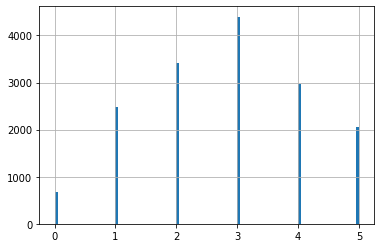

In [6]:
# using to_numeric with errors = coerce to transfer non-numeric into nan
df.DAILY_STRESS = pd.to_numeric(df.DAILY_STRESS,errors="coerce")

#Check null or not
df.DAILY_STRESS.isnull().sum()

#Check distribution of feature
df.DAILY_STRESS.hist(bins=100)

#fill with median
df.DAILY_STRESS.fillna(df.DAILY_STRESS.median(), inplace=True)

In [7]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,2.791698,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,1.367759,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


# EDA

## Check distribution

array([[<AxesSubplot:title={'center':'FRUITS_VEGGIES'}>,
        <AxesSubplot:title={'center':'DAILY_STRESS'}>,
        <AxesSubplot:title={'center':'PLACES_VISITED'}>,
        <AxesSubplot:title={'center':'CORE_CIRCLE'}>,
        <AxesSubplot:title={'center':'SUPPORTING_OTHERS'}>],
       [<AxesSubplot:title={'center':'SOCIAL_NETWORK'}>,
        <AxesSubplot:title={'center':'ACHIEVEMENT'}>,
        <AxesSubplot:title={'center':'DONATION'}>,
        <AxesSubplot:title={'center':'BMI_RANGE'}>,
        <AxesSubplot:title={'center':'TODO_COMPLETED'}>],
       [<AxesSubplot:title={'center':'FLOW'}>,
        <AxesSubplot:title={'center':'DAILY_STEPS'}>,
        <AxesSubplot:title={'center':'LIVE_VISION'}>,
        <AxesSubplot:title={'center':'SLEEP_HOURS'}>,
        <AxesSubplot:title={'center':'LOST_VACATION'}>],
       [<AxesSubplot:title={'center':'DAILY_SHOUTING'}>,
        <AxesSubplot:title={'center':'SUFFICIENT_INCOME'}>,
        <AxesSubplot:title={'center':'PERSONAL_AWARDS'}>,
   

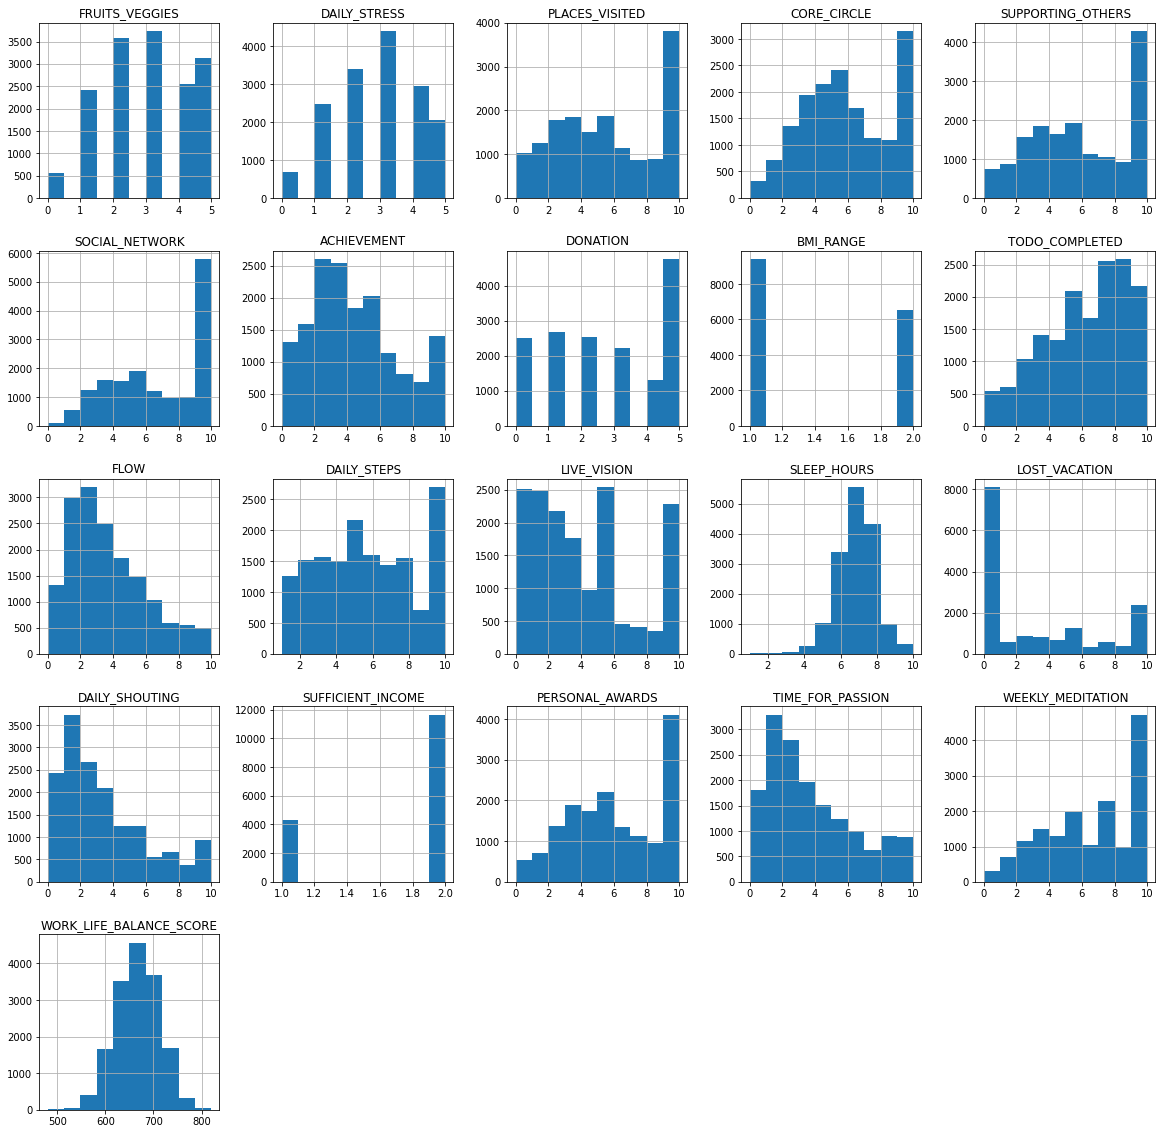

In [8]:
df.hist(figsize=(20,20))

__Most of features are not normal distrbuted. There are 2 binary distribution: sufficient income and BMI_range__

## Categorical exploration

<AxesSubplot:xlabel='GENDER'>

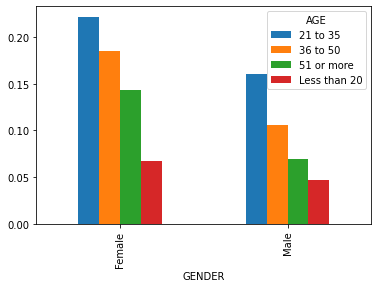

In [9]:
# Gender and Age
pd.crosstab(df.GENDER,df.AGE, normalize=True).plot(kind="bar")

Seems like most people are from 21 to 50 anticipated in the survey. More female than male

<AxesSubplot:xlabel='GENDER'>

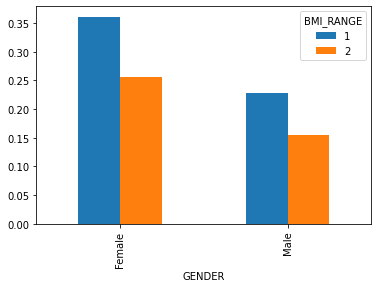

In [10]:
# BMI and gender
pd.crosstab(df.GENDER,df.BMI_RANGE, normalize=True).plot(kind="bar")

Again, rate of female is higher than male. It's also because of higher number of female anticipating

<AxesSubplot:xlabel='GENDER'>

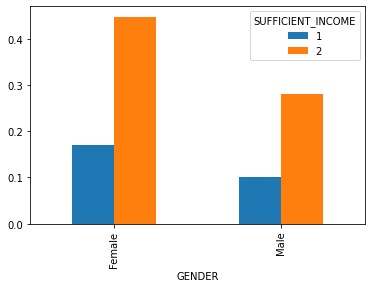

In [11]:
# Sufficient and gender
## Sufficient means: HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES
pd.crosstab(df.GENDER,df.SUFFICIENT_INCOME, normalize=True).plot(kind="bar")

# Feature Transformation & Selection

## Dummy variables encoding for categorical variables

### Replace values for easy understanding

In [12]:
df.BMI_RANGE.replace({1: "BMI < 25", 2: "BMI > 25"}, inplace=True)

In [13]:
df.SUFFICIENT_INCOME.replace({1: "Not or hardly sufficient", 2: "Sufficient"}, inplace=True)

### Get dummies categorical features

In [14]:
BMI = pd.get_dummies(df.BMI_RANGE,drop_first=True)
INCOME = pd.get_dummies(df.SUFFICIENT_INCOME,drop_first=True)
AGE = pd.get_dummies(df.AGE,drop_first=True)
GENDER = pd.get_dummies(df.GENDER,drop_first=True)

### DROP unessarry columns

In [15]:
df.drop(["Timestamp","GENDER","BMI_RANGE","SUFFICIENT_INCOME","AGE"],axis=1,inplace=True)

### CONCATENATE created features

In [16]:
df = pd.concat([df, BMI, INCOME, AGE, GENDER],axis=1)

In [17]:
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0,1,0,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,1,1,1,0,0,0
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,1,1,1,0,0,0
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,1,0,0,1,0,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,1,1,0,1,0,0


## Skewness transformation

### Check skewness 

In [18]:
skewness_dict = {}
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        skewness_dict[column] = df[column].skew()
    else:
        continue

In [19]:
## Sort based on absolute value because which values above 0.25 are considered highly skewed
skewness = sorted(skewness_dict.items(),key=lambda element: abs(element[1]), reverse=True)

Text(0, 0.5, 'Skewness')

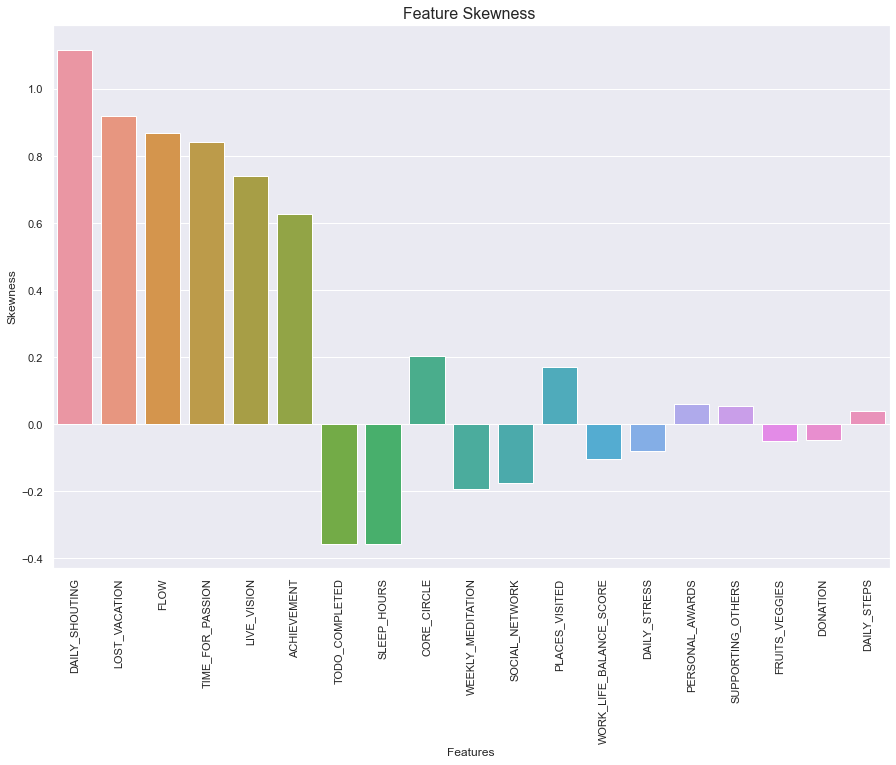

In [20]:
sns.set(rc={'figure.figsize': (15,10)})

#assign x and y for barplot
x_1 = []
for row in skewness:
    value = row[0]
    x_1.append(value)

y_1 = []
for row in skewness:
    value = row[1]
    y_1.append(value)

#plot 
plot = sns.barplot(x=x_1, y=y_1)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plot.set_title("Feature Skewness ", fontsize = 16)
plot.set_xlabel("Features", fontsize = 12)
plot.set_ylabel("Skewness", fontsize = 12)

### Transform skewness data using yeo-johnson

In [21]:
from scipy import stats
from scipy.stats import yeojohnson
transformed_skew = {}
parameters_skew = {}
for col in x_1[:8]:
    transformed_skew[col + "_transformed"], parameters = stats.yeojohnson(df[col])
    parameters_skew[col+"_transformed"] = parameters

transformed_df = pd.DataFrame(transformed_skew)
transformed_df.head()

,DAILY_SHOUTING_transformed,LOST_VACATION_transformed,FLOW_transformed,TIME_FOR_PASSION_transformed,LIVE_VISION_transformed,ACHIEVEMENT_transformed,TODO_COMPLETED_transformed,SLEEP_HOURS_transformed
0,1.868211,1.253469,1.979437,0.000000,0.000000,1.388189,7.455288,16.725277
1,1.127045,0.877468,1.263460,1.206387,2.169449,2.646930,6.085727,20.317733
2,1.127045,1.502612,1.263460,2.656967,2.169449,1.867557,2.233087,20.317733
3,1.868211,1.379739,2.257834,1.206387,0.000000,1.388189,3.466884,10.331872
4,0.000000,-0.000000,0.000000,0.735063,0.000000,1.388189,6.085727,16.725277


### Re-check skewness

In [22]:
skewness_dict_transformed = {}
for column in transformed_df.columns:
        skewness_dict_transformed[column] = transformed_df[column].skew()

In [23]:
## Sort based on absolute value because which values above 0.25 are considered highly skewed
skewness_transformed = sorted(skewness_dict_transformed.items(),key=lambda element: abs(element[1]), reverse=True)

Text(0, 0.5, 'Skewness')

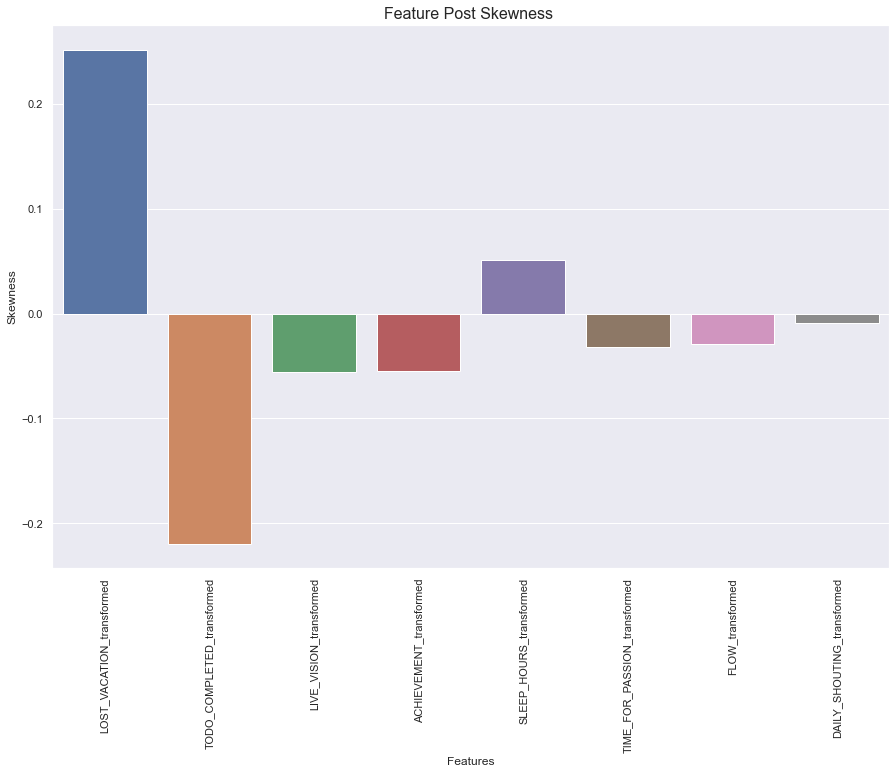

In [24]:
sns.set(rc={'figure.figsize': (15,10)})

#assign x and y for barplot
x_2 = []
for row in skewness_transformed:
    value = row[0]
    x_2.append(value)

y_2 = []
for row in skewness_transformed:
    value = row[1]
    y_2.append(value)

#plot 
plot = sns.barplot(x=x_2, y=y_2)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plot.set_title("Feature Post Skewness ", fontsize = 16)
plot.set_xlabel("Features", fontsize = 12)
plot.set_ylabel("Skewness", fontsize = 12)

In [25]:
# skewed_df
skewed_df = pd.concat((df.drop(columns = [col for col in x_1[:8]]),transformed_df), axis=1)
skewed_df

#non_skew_df
df

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
0,3,2.0,2,5,0,5,2,0,6,4,5,0,7,5,5,4,0,5,609.5,0,0,1,0,0,0
1,2,3.0,4,3,8,10,5,2,5,2,5,5,8,2,2,3,2,6,655.6,1,1,1,0,0,0
2,2,3.0,3,4,4,10,3,2,2,2,4,5,8,10,2,4,8,3,631.6,1,1,1,0,0,0
3,3,3.0,10,3,10,7,2,5,3,5,5,0,5,7,5,5,2,0,622.7,1,0,0,1,0,0
4,5,1.0,3,3,10,4,2,4,5,0,5,0,7,0,0,8,1,5,663.9,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3.0,0,4,0,10,0,4,8,2,10,7,7,0,1,5,2,5,644.5,1,0,0,1,0,0
15968,3,3.0,6,8,7,4,6,3,7,5,6,5,6,0,0,10,5,8,714.9,0,1,0,0,0,0
15969,4,3.0,0,10,10,8,6,5,7,3,5,2,7,0,1,10,1,10,716.6,0,1,0,0,0,1
15970,1,1.0,10,8,2,7,3,2,6,10,1,5,8,7,2,1,6,8,682.0,0,1,0,0,0,0


## Check Multicollinearity by VIF

In [26]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# def calc VIF
def cal_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [28]:
# vif for non_skew df
vif_df = cal_vif(df.drop(columns = "WORK_LIFE_BALANCE_SCORE"))
vif_df.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
12,16.882443,SLEEP_HOURS
8,7.619952,TODO_COMPLETED
5,6.931205,SOCIAL_NETWORK
0,6.289564,FRUITS_VEGGIES
17,6.258040,WEEKLY_MEDITATION
4,6.176328,SUPPORTING_OTHERS
3,6.140938,CORE_CIRCLE
15,5.920416,PERSONAL_AWARDS
10,5.655369,DAILY_STEPS
1,5.556769,DAILY_STRESS


In [29]:
# vif for non_skew df
vif_skewed_df = cal_vif(skewed_df.drop(columns = "WORK_LIFE_BALANCE_SCORE"))
vif_skewed_df.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
23,12.187604,SLEEP_HOURS_transformed
21,7.203467,ACHIEVEMENT_transformed
5,6.953936,SOCIAL_NETWORK
18,6.940586,FLOW_transformed
22,6.857330,TODO_COMPLETED_transformed
0,6.261197,FRUITS_VEGGIES
19,6.212811,TIME_FOR_PASSION_transformed
9,6.202934,WEEKLY_MEDITATION
4,6.177594,SUPPORTING_OTHERS
3,6.134327,CORE_CIRCLE


### Re-calc VIF 

In [30]:
# vif for non_skew df which removed columns having VIF above 5.5
vif_df_2 = cal_vif(df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS", "TODO_COMPLETED", 
                                    "SOCIAL_NETWORK", "FRUITS_VEGGIES","WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS", "PERSONAL_AWARDS"], axis=1))
vif_df_2.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
2,5.368827,CORE_CIRCLE
6,4.941990,DAILY_STEPS
0,4.681365,DAILY_STRESS
3,4.326322,ACHIEVEMENT
5,4.062917,FLOW
1,4.052482,PLACES_VISITED
4,3.758601,DONATION
12,3.754731,Sufficient
10,3.567208,TIME_FOR_PASSION
7,2.877890,LIVE_VISION


In [31]:
# vif for non_skew df which removed columns having VIF above 5.5
vif_skewed_df_2 = cal_vif(skewed_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS_transformed", "ACHIEVEMENT_transformed", 
                                    "SOCIAL_NETWORK", "FLOW_transformed","TODO_COMPLETED_transformed",
                                    "FRUITS_VEGGIES", "TIME_FOR_PASSION_transformed", "WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS"], axis=1))
vif_skewed_df_2.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
2,5.333379,CORE_CIRCLE
5,5.311662,PERSONAL_AWARDS
0,4.955327,DAILY_STRESS
4,4.910006,DAILY_STEPS
1,4.113470,PLACES_VISITED
12,3.852960,DAILY_SHOUTING_transformed
14,3.842954,LIVE_VISION_transformed
7,3.819089,Sufficient
3,3.783363,DONATION
13,1.960194,LOST_VACATION_transformed


# Train model

In [32]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

## Create X and Y for 2 datasets

In [33]:
x_1 = df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS", "TODO_COMPLETED", 
                                    "SOCIAL_NETWORK", "FRUITS_VEGGIES","WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS", "PERSONAL_AWARDS"], axis=1)
y_1 = df.WORK_LIFE_BALANCE_SCORE

x_2 = skewed_df.drop(columns = ["WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS_transformed", "ACHIEVEMENT_transformed", 
                                    "SOCIAL_NETWORK", "FLOW_transformed","TODO_COMPLETED_transformed",
                                    "FRUITS_VEGGIES", "TIME_FOR_PASSION_transformed", "WEEKLY_MEDITATION",
                                    "SUPPORTING_OTHERS"], axis=1)
y_2 = skewed_df.WORK_LIFE_BALANCE_SCORE

## Scaling numeric features

In [34]:
# our scaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# fit the scaler to our data
numeric_x_1 = x_1.drop(columns = ['BMI > 25', 'Sufficient',
       '36 to 50', '51 or more', 'Less than 20', 'Male'],axis =1 )

scaled_numeric_x_1 = pd.DataFrame(scaler.fit_transform(numeric_x_1), columns = numeric_x_1.columns)

x_1 = pd.concat((scaled_numeric_x_1,x_1[['BMI > 25', 'Sufficient',
       '36 to 50', '51 or more', 'Less than 20', 'Male']]),axis=1)
# describe the scaled data
x_1.describe()

,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,ACHIEVEMENT,DONATION,FLOW,DAILY_STEPS,LIVE_VISION,LOST_VACATION,DAILY_SHOUTING,TIME_FOR_PASSION,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,0.558340,0.523297,0.550808,0.400075,0.543063,0.319478,0.522623,0.375213,0.289889,0.293088,0.332657,0.410656,0.728963,0.291448,0.212246,0.113887,0.382795
std,0.273552,0.331191,0.284033,0.275584,0.370317,0.235752,0.321224,0.323099,0.369218,0.267630,0.272929,0.491968,0.444509,0.454443,0.408911,0.317684,0.486084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.300000,0.200000,0.200000,0.100000,0.222222,0.100000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.500000,0.500000,0.300000,0.600000,0.300000,0.444444,0.300000,0.000000,0.200000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.800000,0.800000,0.600000,1.000000,0.500000,0.777778,0.500000,0.500000,0.400000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# # our scaler
# # scaler = MinMaxScaler()
# scaler = StandardScaler()

# # fit the scaler to our data
# numeric_x_1 = x_1.drop(columns = ['BMI > 25', 'Sufficient',
#        '36 to 50', '51 or more', 'Less than 20', 'Male'],axis =1 )

# scaled_numeric_x_1 = pd.DataFrame(scaler.fit_transform(numeric_x_1), columns = numeric_x_1.columns)

# x_1 = pd.concat((scaled_numeric_x_1,x_1[['BMI > 25', 'Sufficient',
#        '36 to 50', '51 or more', 'Less than 20', 'Male']]),axis=1)
# # describe the scaled data
# x_1.describe()

In [36]:
# our scaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# fit the scaler to our data
numeric_x_2 = x_2.drop(columns = ['BMI > 25', 'Sufficient',
       '36 to 50', '51 or more', 'Less than 20', 'Male'],axis =1 )

scaled_numeric_x_2 = pd.DataFrame(scaler.fit_transform(numeric_x_2), columns = numeric_x_2.columns)

x_2 = pd.concat((scaled_numeric_x_2,x_2[['BMI > 25', 'Sufficient',
       '36 to 50', '51 or more', 'Less than 20', 'Male']]),axis=1)
# describe the scaled data
x_2.head()

,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,DONATION,DAILY_STEPS,PERSONAL_AWARDS,DAILY_SHOUTING_transformed,LOST_VACATION_transformed,LIVE_VISION_transformed,BMI > 25,Sufficient,36 to 50,51 or more,Less than 20,Male
0,0.4,0.2,0.5,0.0,0.444444,0.4,0.736638,0.834194,0.000000,0,0,1,0,0,0
1,0.6,0.4,0.3,0.4,0.444444,0.3,0.444396,0.583962,0.698594,1,1,1,0,0,0
2,0.6,0.3,0.4,0.4,0.333333,0.4,0.444396,1.000000,0.698594,1,1,1,0,0,0
3,0.6,1.0,0.3,1.0,0.444444,0.5,0.736638,0.918227,0.000000,1,0,0,1,0,0
4,0.2,0.3,0.3,0.8,0.444444,0.8,0.000000,0.000000,0.000000,1,1,0,1,0,0


In [37]:
# # our scaler
# # scaler = MinMaxScaler()
# scaler = StandardScaler()

# # fit the scaler to our data
# numeric_x_2 = x_2.drop(columns = ['BMI > 25', 'Sufficient',
#        '36 to 50', '51 or more', 'Less than 20', 'Male'],axis =1 )

# scaled_numeric_x_2 = pd.DataFrame(scaler.fit_transform(numeric_x_2), columns = numeric_x_2.columns)

# x_2 = pd.concat((scaled_numeric_x_2,x_2[['BMI > 25', 'Sufficient',
#        '36 to 50', '51 or more', 'Less than 20', 'Male']]),axis=1)
# # describe the scaled data
# x_2.info()

### Compare R2 of 2 dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1,random_state = 0,test_size=0.25)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9218224459993715


In [39]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x_2, y_2,random_state = 0,test_size=0.25)

# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn import linear_model

# regr = linear_model.LinearRegression()
# regr.fit(X_train,y_train)
# y_pred = regr.predict(X_train)

# print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

__=> Use original dataset to train model__

## Chech Multivariate Normality

In [40]:
residuals = y_train.values - y_pred
mean_residuals = np.mean(residuals)
mean_residuals

-8.537189654602196e-14

C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


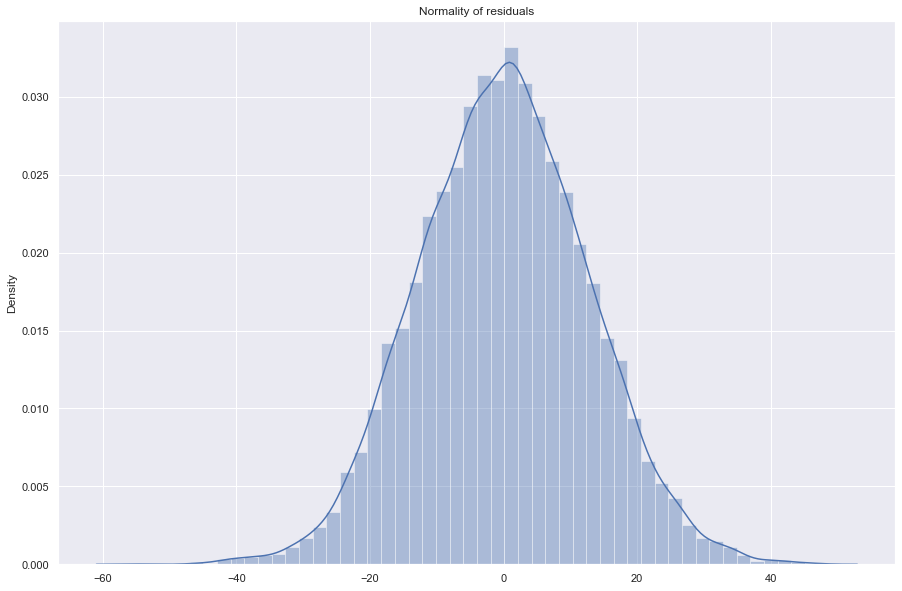

In [41]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of residuals')

__=> Residual distribution is normall distributed. It's good__

## Check Homoscedasticity

C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tris\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


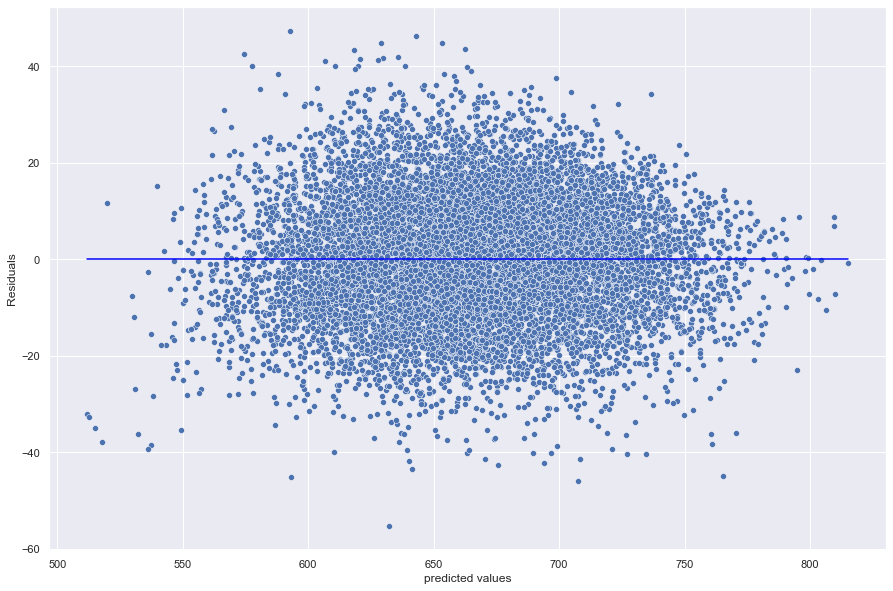

In [42]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')

__=> There is no clear pattern between residuals and predicted values. It's good__

### Check by Goldeld Quantdt test

H0: Error terms are homoscedastic 

H1: the Error terms are heteroscedastic

In [43]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9651359360560795), ('p-value', 0.9148329857291659)]

__=> There is no sufficient evidence to reject the null. It's good__

# Applying model to test dataset

## Apply to test 

Text(0.5, 1.0, 'Model Trained R Squared =0.919')

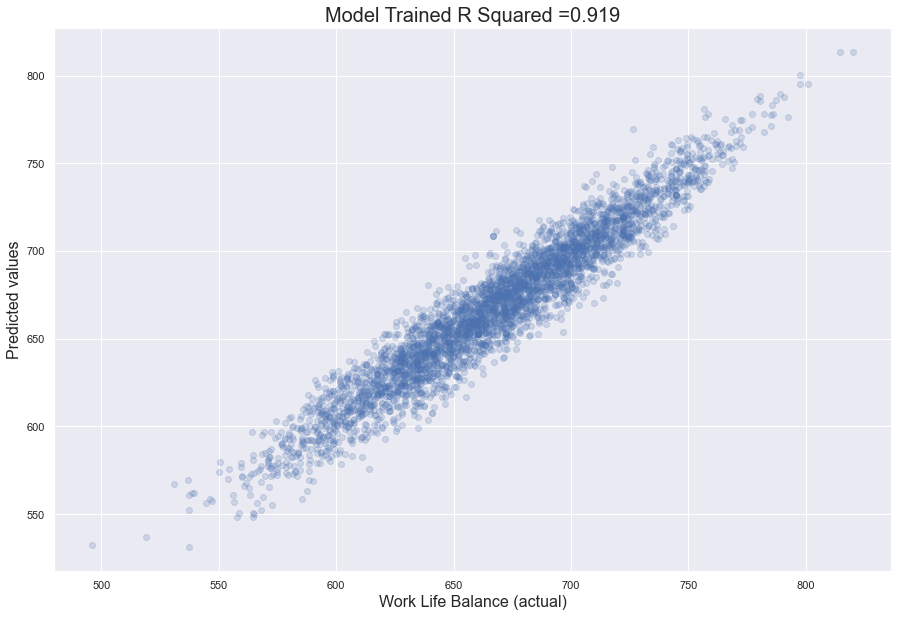

In [44]:
pred_y = regr.predict(X_test)

R2_test = regr.score(X_test,y_test) 
from matplotlib import pyplot as plt
plt.scatter(y_test, pred_y, alpha = 0.2)
plt.xlabel('Work Life Balance (actual)', size = 16)
plt.ylabel('Predicted values', size = 16)

plt.title('Model Trained R Squared ='+ '{number:.3f}'.format(number=R2_test), size = 20)

__=> Look good__

## Check residual

In [45]:
residual_df = pd.DataFrame(pred_y, columns = ['Predicted'])
y_test = y_test.reset_index (drop = True)
residual_df["Target"] = y_test
residual_df["Residual"] = residual_df["Target"] - residual_df["Predicted"]
residual_df["Residual%"] = abs((residual_df["Target"] - residual_df["Predicted"])/residual_df["Target"]*100)
residual_df.describe()

,Predicted,Target,Residual,Residual%
count,3993.000000,3993.000000,3993.000000,3993.000000
mean,668.304109,668.115627,-0.188481,1.519163
std,42.878595,44.699423,12.697363,1.189228
min,531.434291,496.100000,-43.273655,0.000956
25%,638.533794,636.700000,-8.626244,0.575282
50%,668.645524,669.000000,-0.330668,1.270213
75%,698.481882,699.800000,8.375267,2.198111
max,813.233270,820.200000,42.793948,7.289920


__In worste case, max residual percentage is 9%. It means expecting standard deviation to be 9% different from actual values__

## Check feature weight: which features drive target variable the most ?

Text(0.5, 1.0, 'Feature Weights in Linear Regression')

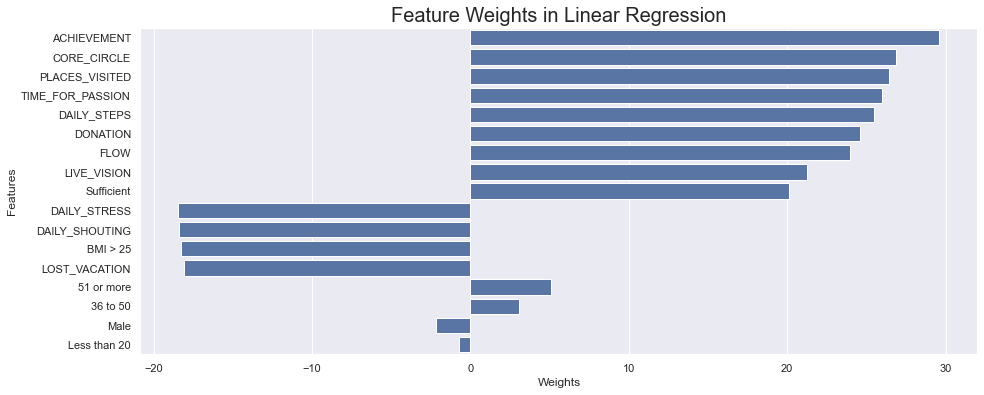

In [46]:
reg_summary = pd.DataFrame(x_1.columns.values, columns = ["Features"])
reg_summary["Weights"] = regr.coef_

# plot bar chart
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="Weights", y="Features", data=reg_summary.sort_values("Weights", ascending=False, key = abs),
            label="Weights", color="b")
ax.set_title("Feature Weights in Linear Regression",fontsize=20)          